# Executive Questions: Product Specific Questions

Author: Yue Ling

Year: 2022




# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import psycopg2

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [2]:
#
# function to run a select query and return rows in a pandas dataframe
# pandas puts all numeric values from postgres to float
# if it will fit in an integer, change it to integer
#

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)
    

In [3]:
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

In [4]:
cursor = connection.cursor()


# 1.3.1 How many meals were purchased for all of AGM?

In [5]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sum(quantity) as meals_purchased
from line_items

"""
# select count(product_id) as meals_purchased// would not work 1 product_id can be bought many times
my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,meals_purchased
0,8228284


# 1.3.2 How many meals were purchased for all of AGM by meal?

Sort by meal name in alphabetical order

In [6]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sum(l.quantity) as meals_purchased, p.description as meals
from line_items l
join products p
on p.product_id = l.product_id
group by 2
order by 2

"""
#can also do count(*)

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,meals_purchased,meals
0,913984,Brocolli Stir Fry
1,228561,Chicken Salad
2,1368884,Curry Chicken
3,1599058,Eggplant Lasagna
4,1828778,Pistachio Salmon
5,456769,Spinach Orzo
6,1145013,Teriyaki Chicken
7,687237,Tilapia Piccata


# 1.3.3 How many meals were purchased by store and by meal?

Sort by store name in alphabetical order, then by meal name in alphabetical order

In [7]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sum(l.quantity) as meals_purchased, s.city as store_name,p.description as meals
from line_items l
join products p
    on p.product_id = l.product_id
join sales sa
    on sa.sale_id = l.sale_id 
    and sa.store_id = l.store_id 

join stores s
    on s.store_id = sa.store_id

group by 2,3
order by 2,3

"""
#can also do count(*)
# should be the same as join on s.store_id = l.store_id directly //inner join

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,meals_purchased,store_name,meals
0,232038,Berkeley,Brocolli Stir Fry
1,57719,Berkeley,Chicken Salad
2,346508,Berkeley,Curry Chicken
3,405637,Berkeley,Eggplant Lasagna
4,464274,Berkeley,Pistachio Salmon
5,115469,Berkeley,Spinach Orzo
6,290858,Berkeley,Teriyaki Chicken
7,174252,Berkeley,Tilapia Piccata
8,179885,Dallas,Brocolli Stir Fry
9,44756,Dallas,Chicken Salad


# 1.3.4 How many meals were purchased by month?

Sort by month in calendar order

In [8]:
#test
#joining on line_items.store_id on stores.store_id directly 

rollback_before_flag = True
rollback_after_flag = True

query = """

select  sum(l.quantity) as meals_purchased, 
    extract(month from sa.sale_date) as month_number, to_char(sa.sale_date, 'Month') as month_name
from line_items l
join sales sa
    on sa.store_id = l.store_id
    and sa.sale_id = l.sale_id
    
group by 2,3 
order by 2,3

"""
#also need to group by "to_char(sa.sale_date, 'Month') as month_name", otherwise, sql will ask sa.sale_date to be in the 
#group by statement 

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)


,meals_purchased,month_number,month_name
0,650319,1,January
1,631190,2,February
2,731635,3,March
3,687607,4,April
4,664820,5,May
5,677009,6,June
6,666087,7,July
7,752484,8,August
8,631580,9,September
9,741259,10,October


# 1.3.5 How many meals were purchased by month and meal?

Sort by month in calendar order, then by meal name in alphabetical order

In [9]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select  sum(l.quantity) as meals_purchased, 
    extract(month from sa.sale_date) as month_number, to_char(sa.sale_date, 'Month') as month_name,
    p.description as meal_name
from line_items l
join sales sa
    on sa.store_id = l.store_id
    and sa.sale_id = l.sale_id
join products p
    on p.product_id = l.product_id
    
group by 2,3,4
order by 2,3,4

"""
#also need to group by "to_char(sa.sale_date, 'Month') as month_name", otherwise, sql will ask sa.sale_date to be in the 
#group by statement 

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,meals_purchased,month_number,month_name,meal_name
0,72161,1,January,Brocolli Stir Fry
1,18003,1,January,Chicken Salad
2,108134,1,January,Curry Chicken
3,126605,1,January,Eggplant Lasagna
4,144053,1,January,Pistachio Salmon
...,...,...,...,...
91,134666,12,December,Eggplant Lasagna
92,154242,12,December,Pistachio Salmon
93,38297,12,December,Spinach Orzo
94,96896,12,December,Teriyaki Chicken


# 1.3.6 How many meals were purchased by day of week and meal?

Sort by day of week in day of week order, then by meal name in alphabetical order

In [10]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select  sum(l.quantity) as meals_purchased, 
    extract(dow from sa.sale_date) as dow,
       to_char(sa.sale_date, 'Day') as day_of_week,
    p.description as meal_name
from line_items l
join sales sa
    on sa.store_id = l.store_id
    and sa.sale_id = l.sale_id
join products p
    on p.product_id = l.product_id
    
group by 2,3,4
order by 2,3,4

"""
#also need to group by "to_char(sa.sale_date, 'Month') as month_name", otherwise, sql will ask sa.sale_date to be in the 
#group by statement 

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,meals_purchased,dow,day_of_week,meal_name
0,172250,0,Sunday,Brocolli Stir Fry
1,43110,0,Sunday,Chicken Salad
2,257216,0,Sunday,Curry Chicken
3,301726,0,Sunday,Eggplant Lasagna
4,344315,0,Sunday,Pistachio Salmon
5,85968,0,Sunday,Spinach Orzo
6,215741,0,Sunday,Teriyaki Chicken
7,128763,0,Sunday,Tilapia Piccata
8,121717,1,Monday,Brocolli Stir Fry
9,30790,1,Monday,Chicken Salad


# 1.3.7 Average number of meals per sale for all of AGM


In [11]:
rollback_before_flag = True
rollback_after_flag = True

query = """
select avg(a.quant_sold) as avg_meals_per_sale
from 
(select sum(quantity) as quant_sold
from line_items l
group by sale_id, store_id
) a
"""

#select avg(total_amount / 12) as avg_meals_per_sale from 
# above also works: total_amount is spent per sale, 12 is the dollars per meal = meals sold per sale 
my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,avg_meals_per_sale
0,5.351322


# 1.3.8 Average number of meals per sale by store

Sort by store name in alphabetical order


In [12]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select avg(a.quant_sold_per_sale) as avg_meals_per_sale, a.store_name
from 
    (select sum(quantity) as quant_sold_per_sale, s.city as store_name
    from line_items l
    join stores s
        on s.store_id = l.store_id
    
    group by l.sale_id, l.store_id, s.city
    ) a
group by a.store_name
order by a.store_name
"""
# per sale // store and sale id dependent 

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,avg_meals_per_sale,store_name
0,5.345514,Berkeley
1,5.353353,Dallas
2,5.359892,Miami
3,5.332978,Nashville
4,5.361470,Seattle


# 1.3.9 Data visualization of the most impactful learning: which meal type is more popular

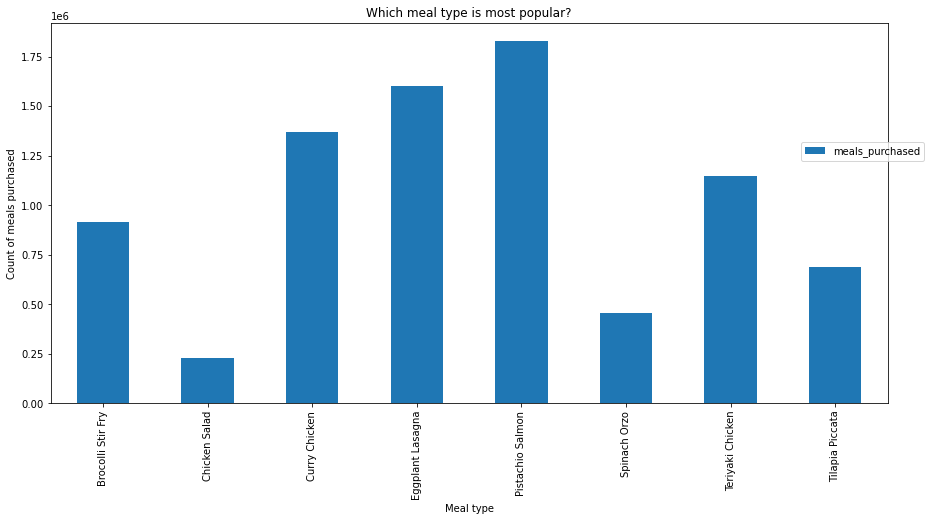

In [13]:
df.plot.bar(figsize=(15,7))

plt.title('Which meal type is most popular?')
plt.xlabel('Meal type')
plt.ylabel('Count of meals purchased')

plt.xticks(np.arange(8), labels=df['meals'])
plt.legend(bbox_to_anchor=(1.05, 0.7))
plt.show()